<a href="https://colab.research.google.com/github/mayanksreal/super-ocr/blob/main/deep_neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependencies

In [12]:
from tensorflow.keras.datasets import mnist # type:ignore
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input # type:ignore
from tensorflow.keras.models import Sequential # type:ignore
from matplotlib import pyplot as plt

### Load Dataset

In [13]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

## Simple Neural Network

Let's try a single-layered neural network

### Building and training

In [ ]:
model = Sequential()


model.add(Input(shape=(28,28)))
model.add(Flatten())

model.add(Dense(64, 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10, 'softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8085 - loss: 0.6449 - val_accuracy: 0.9450 - val_loss: 0.1901
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9343 - loss: 0.2236 - val_accuracy: 0.9601 - val_loss: 0.1414
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9507 - loss: 0.1703 - val_accuracy: 0.9640 - val_loss: 0.1228
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9550 - loss: 0.1468 - val_accuracy: 0.9666 - val_loss: 0.1193
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9609 - loss: 0.1268 - val_accuracy: 0.9682 - val_loss: 0.1064
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9634 - loss: 0.1143 - val_accuracy: 0.9690 - val_loss: 0.1033
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9687 - loss: 0.1015 - val_accuracy: 0.9706 - val_loss: 0.1044
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9688 - loss: 0.0994 -

### Results

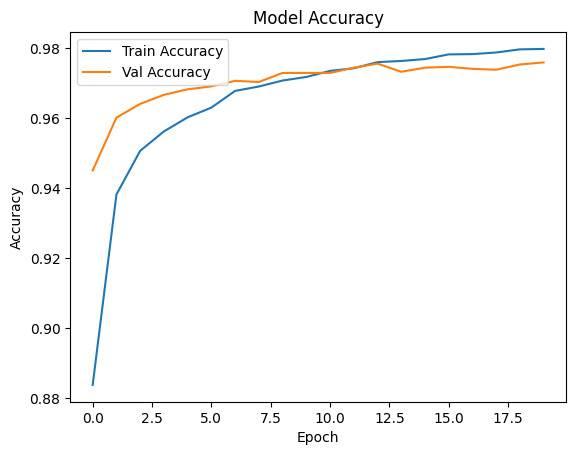

In [ ]:
plt.plot(history.history['accuracy'][0:], label='Train Accuracy')
plt.plot(history.history['val_accuracy'][0:], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9696 - loss: 0.1180


[0.09707139432430267, 0.9742000102996826]

We can see from the plot that single-layer model begins to overfit after only 10 epochs, giving test accuracy of only 97%.

## Deep Neural Network

Let's try a deep neural network with several connected layers

### Building and training

In [ ]:
model = Sequential()


model.add(Input(shape=(28,28)))
model.add(Flatten())

#Three fully connected layers

model.add(Dense(64, 'relu'))
model.add(Dropout(0.2))

model.add(Dense(64, 'relu'))
model.add(Dropout(0.2))

model.add(Dense(64, 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10, 'softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7336 - loss: 0.8098 - val_accuracy: 0.9475 - val_loss: 0.1749
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9222 - loss: 0.2675 - val_accuracy: 0.9563 - val_loss: 0.1465
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9362 - loss: 0.2135 - val_accuracy: 0.9628 - val_loss: 0.1280
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9482 - loss: 0.1740 - val_accuracy: 0.9632 - val_loss: 0.1219
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9523 - loss: 0.1569 - val_accuracy: 0.9657 - val_loss: 0.1227
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9564 - loss: 0.1472 - val_accuracy: 0.9658 - val_loss: 0.1212
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9594 - loss: 0.1408 - val_accuracy: 0.9690 - val_loss: 0.1095
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9643 - loss: 0.1237 - 

### Results

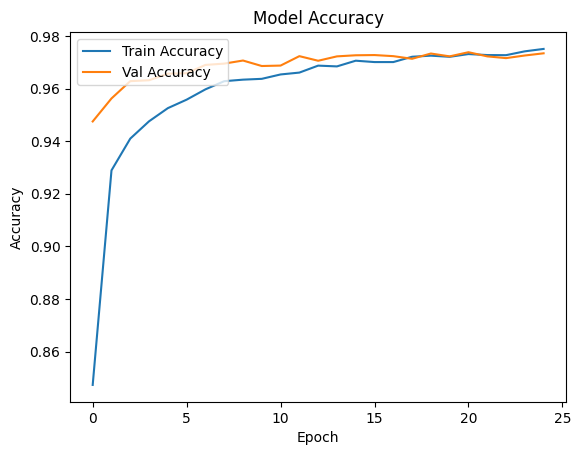

In [ ]:
plt.plot(history.history['accuracy'][0:], label='Train Accuracy')
plt.plot(history.history['val_accuracy'][0:], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9686 - loss: 0.1145


[0.10163957625627518, 0.9729999899864197]

While the model took much longer to train and did not overfit until about 15 epochs, there was little to no improvement in test accuracy.

## Funneling Deep Neural Networks
Let's try a funneling deep neural network with increasingly smaller units in each dense layer.

### Building and training

In [14]:
model = Sequential()


model.add(Input(shape=(28,28)))
model.add(Flatten())

#Three fully connected layers

model.add(Dense(256, 'relu'))
model.add(Dropout(0.2))

model.add(Dense(128, 'relu'))
model.add(Dropout(0.2))

model.add(Dense(64, 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10, 'softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8159 - loss: 0.5836 - val_accuracy: 0.9556 - val_loss: 0.1474
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9498 - loss: 0.1661 - val_accuracy: 0.9689 - val_loss: 0.1086
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9650 - loss: 0.1226 - val_accuracy: 0.9704 - val_loss: 0.0955
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9694 - loss: 0.1023 - val_accuracy: 0.9744 - val_loss: 0.0893
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9741 - loss: 0.0836 - val_accuracy: 0.9750 - val_loss: 0.0906
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9782 - loss: 0.0733 - val_accuracy: 0.9764 - val_loss: 0.0861
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9797 - loss: 0.0681 - val_accuracy: 0.9731 - val_loss: 0.0964
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9814 - loss: 0.0596 - 

### Results

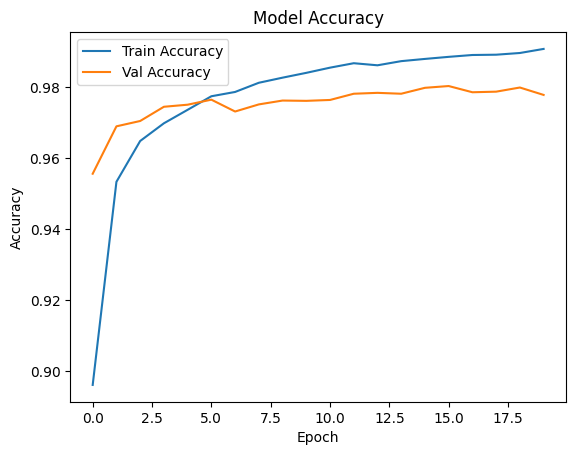

In [16]:
plt.plot(history.history['accuracy'][0:], label='Train Accuracy')
plt.plot(history.history['val_accuracy'][0:], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [18]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9755 - loss: 0.1265


[0.10499484837055206, 0.979200005531311]

We can see that such a model gave substanially better results with upto 98% test accuracy only after 5 epochs of training, however after that model overfits

## Conclusion
We have tried very complex models already to no avail. Now we move on to CNNs which can acheive higher accuracies in simpler models

## Convolutional Neural Networks

Let's try a simple CNN on our dataset

### Building and training

Reshaping data for CNN

In [3]:
x_train, y_train = x_train.reshape(60000, 28,28,1) , y_train#.reshape(60000, 1)
x_test, y_test = x_test.reshape(10000, 28,28,1) , y_test#.reshape(10000, 1)

CNN Model

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D #type:ignore
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
model = Sequential()

model.add(Input(shape=(28,28,1)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(32, 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, 'softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [7]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=20, callbacks=[early_stopping])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8156 - loss: 0.5687 - val_accuracy: 0.9783 - val_loss: 0.0730
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9632 - loss: 0.1217 - val_accuracy: 0.9803 - val_loss: 0.0641
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9749 - loss: 0.0892 - val_accuracy: 0.9859 - val_loss: 0.0486
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9783 - loss: 0.0714 - val_accuracy: 0.9869 - val_loss: 0.0442
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9817 - loss: 0.0594 - val_accuracy: 0.9859 - val_loss: 0.0497
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9826 - loss: 0.0577 - val_accuracy: 0.9893 - val_loss: 0.0367
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9835 - loss: 0.0493 - val_accuracy: 0.9878 - val_loss: 0.0410
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9858 - loss: 0.0457 

### Results

In [8]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9883 - loss: 0.0358


[0.03037109039723873, 0.9901000261306763]

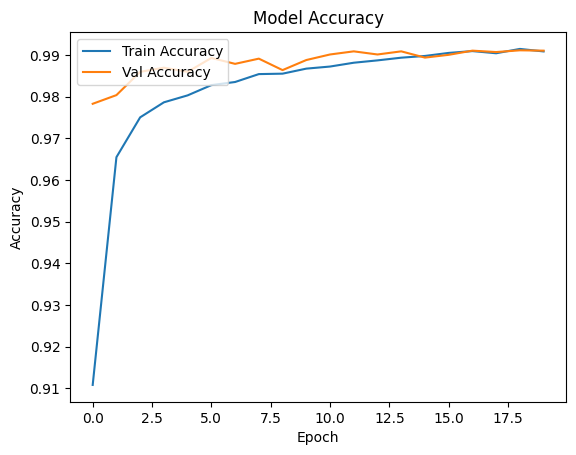

In [9]:
plt.plot(history.history['accuracy'][0:], label='Train Accuracy')
plt.plot(history.history['val_accuracy'][0:], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

CNN gives, about same or higher result metrics for much less training times and simpler model